In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [3]:
#import data
data = pd.read_csv('data.csv')
data.head()

,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,...,Q30,Q31,Q32,affiliative,selfenhancing,agressive,selfdefeating,age,gender,accuracy
0,2,2,3,1,4,5,4,3,4,3,...,4,2,2,4.0,3.5,3.0,2.3,25,2,100
1,2,3,2,2,4,4,4,3,4,3,...,4,3,1,3.3,3.5,3.3,2.4,44,2,90
2,3,4,3,3,4,4,3,1,2,4,...,5,4,2,3.9,3.9,3.1,2.3,50,1,75
3,3,3,3,4,3,5,4,3,-1,4,...,5,3,3,3.6,4.0,2.9,3.3,30,2,85
4,1,4,2,2,3,5,4,1,4,4,...,5,4,2,4.1,4.1,2.9,2.0,52,1,80


In [8]:
data["gender"].value_counts()

1    581
2    477
3      8
0      5
Name: gender, dtype: int64

In [15]:
data["age"].value_counts()

22       79
18       74
20       71
16       69
19       65
17       63
21       52
23       45
26       44
15       37
25       37
24       35
27       34
14       25
30       24
28       23
29       22
32       22
35       21
33       16
31       16
40       15
39       14
34       13
41       12
37       11
46        9
36        9
38        8
45        8
48        7
44        7
51        6
42        6
61        6
49        6
55        5
53        5
50        5
43        5
54        5
52        5
64        4
57        3
62        3
47        3
70        2
58        2
69        2
59        2
56        1
2670      1
66        1
60        1
67        1
151       1
242       1
68        1
44849     1
Name: age, dtype: int64

In [16]:
data["age"]

0       25
1       44
2       50
3       30
4       52
        ..
1066    18
1067    31
1068    15
1069    21
1070    30
Name: age, Length: 1071, dtype: int64

In [11]:
modified_values = data[data.age<151].age
print(modified_values.mean())
print(modified_values.median())
print(modified_values.mode()[0])

26.32895970009372
22.0
22


In [13]:
#checking for missing values
x = data.isnull().sum()
set(x)

{0}

<AxesSubplot:>

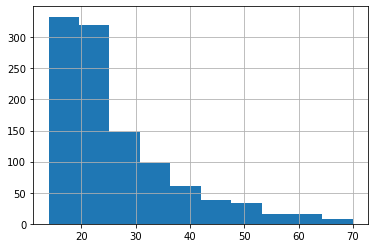

In [14]:
data.age[data.age < 150].hist()

In [38]:
#errorvalues = data[data.age > 150].age
#print(errorvalues)    
#data.replace(to_replace = errorvalues, value = 22)

293      242
303      151
632     2670
957    44849
Name: age, dtype: int64


,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,...,Q30,Q31,Q32,affiliative,selfenhancing,agressive,selfdefeating,age,gender,accuracy
0,2,2,3,1,4,5,4,3,4,3,...,4,2,2,4.0,3.5,3.0,2.3,25,2,100
1,2,3,2,2,4,4,4,3,4,3,...,4,3,1,3.3,3.5,3.3,2.4,44,2,90
2,3,4,3,3,4,4,3,1,2,4,...,5,4,2,3.9,3.9,3.1,2.3,50,1,75
3,3,3,3,4,3,5,4,3,-1,4,...,5,3,3,3.6,4.0,2.9,3.3,30,2,85
4,1,4,2,2,3,5,4,1,4,4,...,5,4,2,4.1,4.1,2.9,2.0,52,1,80
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1066,3,2,3,3,2,5,3,2,3,4,...,4,4,4,2.5,3.3,2.9,3.0,18,2,95
1067,1,4,5,2,4,4,1,2,2,5,...,4,1,2,4.8,3.9,2.5,2.4,31,1,95
1068,1,4,4,5,4,4,3,5,4,3,...,4,1,5,4.4,3.9,3.0,4.3,15,1,95
1069,3,4,4,3,3,4,3,2,4,3,...,4,3,3,3.1,3.6,2.9,2.8,21,2,87


In [4]:
# Create X (all the feature columns)
X = data.drop(["affiliative", 
              "selfenhancing",
              "agressive",
              "selfdefeating",
              "age"],
              axis=1)

# Create y (the target column)
y = data[["gender"]]

In [6]:
X

,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,...,Q26,Q27,Q28,Q29,Q30,Q31,Q32,age,gender,accuracy
0,2,2,3,1,4,5,4,3,4,3,...,3,2,4,2,4,2,2,25,2,100
1,2,3,2,2,4,4,4,3,4,3,...,5,1,2,4,4,3,1,44,2,90
2,3,4,3,3,4,4,3,1,2,4,...,4,3,3,2,5,4,2,50,1,75
3,3,3,3,4,3,5,4,3,-1,4,...,4,2,2,4,5,3,3,30,2,85
4,1,4,2,2,3,5,4,1,4,4,...,5,2,3,2,5,4,2,52,1,80
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1066,3,2,3,3,2,5,3,2,3,4,...,4,3,2,5,4,4,4,18,2,95
1067,1,4,5,2,4,4,1,2,2,5,...,4,5,4,1,4,1,2,31,1,95
1068,1,4,4,5,4,4,3,5,4,3,...,4,4,4,2,4,1,5,15,1,95
1069,3,4,4,3,3,4,3,2,4,3,...,4,2,3,3,4,3,3,21,2,87


In [7]:
y

,gender
0,2
1,2
2,1
3,2
4,1
...,...
1066,2
1067,1
1068,1
1069,2


In [42]:
#split into train and test values
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size = 0.2)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((856, 35), (215, 35), (856, 1), (215, 1))

In [59]:
#predict using random forest multiclass classifier
from sklearn.ensemble import RandomForestClassifier

# Setup random seed
np.random.seed(42)
# Instantiate and fit the model (on the training set)
RFC = RandomForestClassifier()
RFC.fit(X_train, y_train.values.ravel())

RandomForestClassifier()

In [63]:
# Check the score of the model (on the test set)
RFC.score(X_test, y_test)
print(f"Random Forest Classifier Accuracy: {RFC.score(X_test, y_test) * 100:.2f}%")

Random Forest Classifier Accuracy: 98.14%


In [57]:
#predict using K nearest Neighbours
from sklearn.svm import LinearSVC

# Setup random seed
np.random.seed(42)
clf = LinearSVC(max_iter=3000)
clf.fit(X_train, y_train.values.ravel())

C:\Users\River\anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


LinearSVC(max_iter=3000)

In [64]:
# Check the score of the model (on the test set)
clf.score(X_test, y_test)
print(f"Linear SVC Classifier Accuracy: {clf.score(X_test, y_test) * 100:.2f}%")

Linear SVC Classifier Accuracy: 97.67%


In [55]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=4)
neigh.fit(X_train, y_train.values.ravel())


KNeighborsClassifier(n_neighbors=4)

In [65]:
# Check the score of the model (on the test set)
neigh.score(X_test, y_test)
print(f"K nearest Neightbour Classifier Accuracy: {neigh.score(X_test, y_test) * 100:.2f}%")

K nearest Neightbour Classifier Accuracy: 57.21%


In [70]:
#Other evaluation methods
#Confusion matrix
#for random forest
from sklearn.metrics import confusion_matrix

y_preds = RFC.predict(X_test)

confusion_matrix(y_test, y_preds)


array([[  0,   1,   0,   0],
       [  0, 115,   0,   0],
       [  0,   0,  96,   0],
       [  0,   0,   3,   0]], dtype=int64)

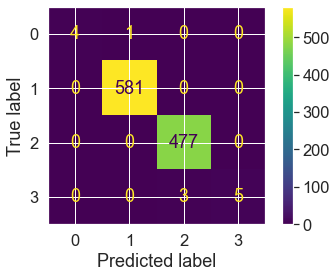

In [74]:
from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(RFC, X, y)

In [75]:
#for Linear SVC
from sklearn.metrics import confusion_matrix

y_preds = clf.predict(X_test)

confusion_matrix(y_test, y_preds)


array([[  0,   1,   0,   0],
       [  0, 115,   0,   0],
       [  0,   0,  95,   1],
       [  0,   0,   3,   0]], dtype=int64)

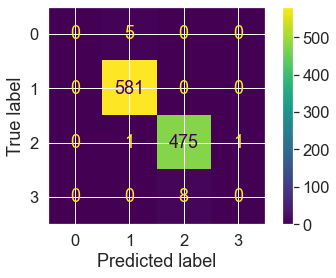

In [76]:
from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(clf, X, y)

In [77]:
#for K Nearest Neighbours
from sklearn.metrics import confusion_matrix

y_preds = neigh.predict(X_test)

confusion_matrix(y_test, y_preds)

array([[ 0,  1,  0,  0],
       [ 0, 95, 20,  0],
       [ 1, 67, 28,  0],
       [ 0,  1,  2,  0]], dtype=int64)

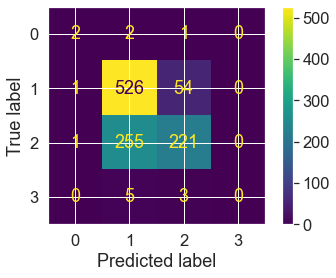

In [79]:
from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(neigh, X, y)

In [80]:
#Classification report
#Random Forest
from sklearn.metrics import classification_report
y_preds = RFC.predict(X_test)
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.99      1.00      1.00       115
           2       0.97      1.00      0.98        96
           3       0.00      0.00      0.00         3

    accuracy                           0.98       215
   macro avg       0.49      0.50      0.50       215
weighted avg       0.96      0.98      0.97       215



C:\Users\River\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\River\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\River\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [81]:
#Linear SVC
from sklearn.metrics import classification_report
y_preds = clf.predict(X_test)
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.99      1.00      1.00       115
           2       0.97      0.99      0.98        96
           3       0.00      0.00      0.00         3

    accuracy                           0.98       215
   macro avg       0.49      0.50      0.49       215
weighted avg       0.96      0.98      0.97       215



C:\Users\River\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\River\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\River\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [82]:
#K Nearest Neighbours
from sklearn.metrics import classification_report
y_preds = neigh.predict(X_test)
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.58      0.83      0.68       115
           2       0.56      0.29      0.38        96
           3       0.00      0.00      0.00         3

    accuracy                           0.57       215
   macro avg       0.28      0.28      0.27       215
weighted avg       0.56      0.57      0.54       215



C:\Users\River\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\River\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\River\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
